In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


In [2]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

In [6]:
def multi_hot_sequences(sequences, dimension):
    results = np.zeros((len(sequences),dimension))
    for i,word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0
    return results
train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

## 构建模型

In [12]:
baseline_model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

baseline_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy','binary_crossentropy'])

baseline_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [14]:
baseline_history = baseline_model.fit(train_data,
                                     train_labels,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(test_data,test_labels),
                                     verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 24s - loss: 0.4827 - accuracy: 0.8022 - binary_crossentropy: 0.4827 - val_loss: 0.3346 - val_accuracy: 0.8782 - val_binary_crossentropy: 0.3346
Epoch 2/20
25000/25000 - 5s - loss: 0.2474 - accuracy: 0.9135 - binary_crossentropy: 0.2474 - val_loss: 0.2864 - val_accuracy: 0.8857 - val_binary_crossentropy: 0.2864
Epoch 3/20
25000/25000 - 3s - loss: 0.1804 - accuracy: 0.9371 - binary_crossentropy: 0.1804 - val_loss: 0.2960 - val_accuracy: 0.8814 - val_binary_crossentropy: 0.2960
Epoch 4/20
25000/25000 - 3s - loss: 0.1424 - accuracy: 0.9523 - binary_crossentropy: 0.1424 - val_loss: 0.3202 - val_accuracy: 0.8772 - val_binary_crossentropy: 0.3202
Epoch 5/20
25000/25000 - 3s - loss: 0.1152 - accuracy: 0.9632 - binary_crossentropy: 0.1152 - val_loss: 0.3436 - val_accuracy: 0.8749 - val_binary_crossentropy: 0.3436
Epoch 6/20
25000/25000 - 3s - loss: 0.0929 - accuracy: 0.9719 - binary_crossentropy: 0.0929 - val_loss: 0.387

In [17]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

smaller_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [18]:
smaller_history = smaller_model.fit(train_data,
                                   train_labels,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(test_data, test_labels),
                                   verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 6s - loss: 0.6349 - accuracy: 0.6260 - binary_crossentropy: 0.6349 - val_loss: 0.5859 - val_accuracy: 0.7444 - val_binary_crossentropy: 0.5859
Epoch 2/20
25000/25000 - 3s - loss: 0.5348 - accuracy: 0.8020 - binary_crossentropy: 0.5348 - val_loss: 0.5202 - val_accuracy: 0.8175 - val_binary_crossentropy: 0.5202
Epoch 3/20
25000/25000 - 3s - loss: 0.4708 - accuracy: 0.8656 - binary_crossentropy: 0.4708 - val_loss: 0.4769 - val_accuracy: 0.8548 - val_binary_crossentropy: 0.4769
Epoch 4/20
25000/25000 - 3s - loss: 0.4226 - accuracy: 0.8962 - binary_crossentropy: 0.4226 - val_loss: 0.4455 - val_accuracy: 0.8666 - val_binary_crossentropy: 0.4455
Epoch 5/20
25000/25000 - 3s - loss: 0.3823 - accuracy: 0.9165 - binary_crossentropy: 0.3823 - val_loss: 0.4204 - val_accuracy: 0.8732 - val_binary_crossentropy: 0.4204
Epoch 6/20
25000/25000 - 3s - loss: 0.3470 - accuracy: 0.9300 - binary_crossentropy: 0.3470 - val_loss: 0.3999

In [20]:
bigger_model = keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               5120512   
_________________________________________________________________
dense_13 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [21]:
bigger_history = bigger_model.fit(train_data,
                                 train_labels,
                                 epochs=20,
                                 batch_size=512,
                                 validation_data=(test_data,test_labels),
                                 verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 30s - loss: 0.3532 - accuracy: 0.8482 - binary_crossentropy: 0.3532 - val_loss: 0.2917 - val_accuracy: 0.8800 - val_binary_crossentropy: 0.2917
Epoch 2/20
25000/25000 - 22s - loss: 0.1482 - accuracy: 0.9475 - binary_crossentropy: 0.1482 - val_loss: 0.3250 - val_accuracy: 0.8742 - val_binary_crossentropy: 0.3250
Epoch 3/20
25000/25000 - 22s - loss: 0.0521 - accuracy: 0.9842 - binary_crossentropy: 0.0521 - val_loss: 0.4220 - val_accuracy: 0.8693 - val_binary_crossentropy: 0.4220
Epoch 4/20
25000/25000 - 21s - loss: 0.0074 - accuracy: 0.9988 - binary_crossentropy: 0.0074 - val_loss: 0.5666 - val_accuracy: 0.8680 - val_binary_crossentropy: 0.5666
Epoch 5/20
25000/25000 - 21s - loss: 9.6795e-04 - accuracy: 1.0000 - binary_crossentropy: 9.6795e-04 - val_loss: 0.6667 - val_accuracy: 0.8705 - val_binary_crossentropy: 0.6667
Epoch 6/20
25000/25000 - 22s - loss: 2.6026e-04 - accuracy: 1.0000 - binary_crossentropy: 2.6026e

## 绘制训练和验证损失

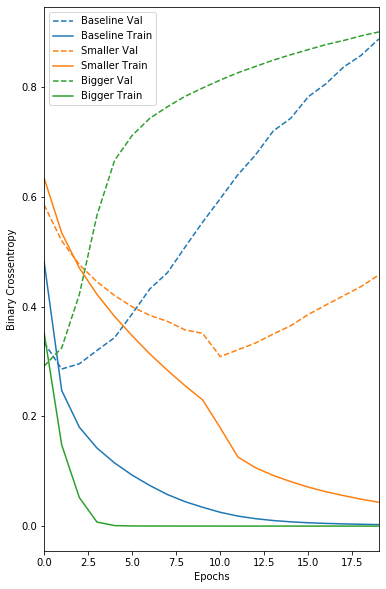

In [24]:
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(6,10))
    
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                      '--',label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                label=name.title()+' Train')
    plt.xlabel("Epochs")
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()
    
    plt.xlim([0,max(history.epoch)])
    
plot_history([('baseline',baseline_history),
             ('smaller',smaller_history),
             ('bigger',bigger_history)])

## 添加L1、L2正则化（权重正则化）

In [30]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                      activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                      activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

l2_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy','binary_crossentropy'])

l2_model_history = l2_model.fit(train_data,train_labels,
                               epochs=20,
                               batch_size=512,
                               validation_data=(test_data,test_labels),
                               verbose=1)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 7s 262us/sample - loss: 0.5471 - accuracy: 0.7819 - binary_crossentropy: 0.5082 - val_loss: 0.3884 - val_accuracy: 0.8736 - val_binary_crossentropy: 0.3475
Epoch 2/20
25000/25000 [==============================] - 3s 135us/sample - loss: 0.3096 - accuracy: 0.9066 - binary_crossentropy: 0.2636 - val_loss: 0.3333 - val_accuracy: 0.8888 - val_binary_crossentropy: 0.2838
Epoch 3/20
25000/25000 [==============================] - 3s 136us/sample - loss: 0.2568 - accuracy: 0.9282 - binary_crossentropy: 0.2047 - val_loss: 0.3374 - val_accuracy: 0.8863 - val_binary_crossentropy: 0.2837
Epoch 4/20
25000/25000 [==============================] - 3s 135us/sample - loss: 0.2342 - accuracy: 0.9378 - binary_crossentropy: 0.1787 - val_loss: 0.3531 - val_accuracy: 0.8797 - val_binary_crossentropy: 0.2964
Epoch 5/20
25000/25000 [==============================] - 4s 148us/sample - loss: 0.2193 - acc

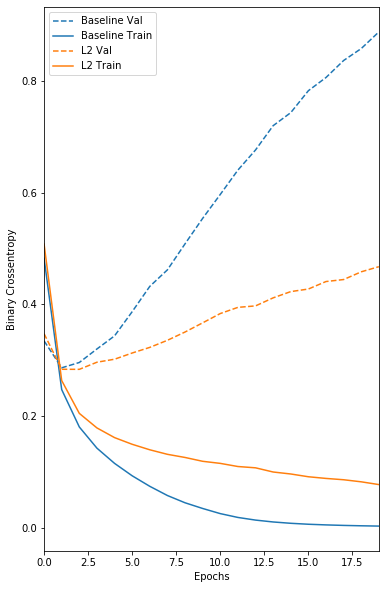

In [31]:
plot_history([
    ('baseline', baseline_history),
    ('l2', l2_model_history)
])

### 结果表明，L2正则化具有更高的抗过拟合能力

## 添加dropout正则化

In [32]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu',input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                 epochs=20,
                                 batch_size=512,
                                 validation_data=(test_data,test_labels))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 6s 256us/sample - loss: 0.6274 - accuracy: 0.6486 - binary_crossentropy: 0.6274 - val_loss: 0.5038 - val_accuracy: 0.8539 - val_binary_crossentropy: 0.5038
Epoch 2/20
25000/25000 [==============================] - 3s 138us/sample - loss: 0.4720 - accuracy: 0.7968 - binary_crossentropy: 0.4720 - val_loss: 0.3664 - val_accuracy: 0.8786 - val_binary_crossentropy: 0.3664
Epoch 3/20
25000/25000 [==============================] - 4s 143us/sample - loss: 0.3693 - accuracy: 0.8565 - binary_crossentropy: 0.3693 - val_loss: 0.2975 - val_accuracy: 0.8862 - val_binary_crossentropy: 0.2975
Epoch 4/20
25000/25000 [==============================] - 3s 137us/sample - loss: 0.3112 - accuracy: 0.8854 - binary_crossentropy: 0.3112 - val_loss: 0.2779 - val_accuracy: 0.8874 - val_binary_crossentropy: 0.2779
Epoch 5/20
25000/25000 [==============================] - 3s 135us/sample - loss: 0.2675 - acc

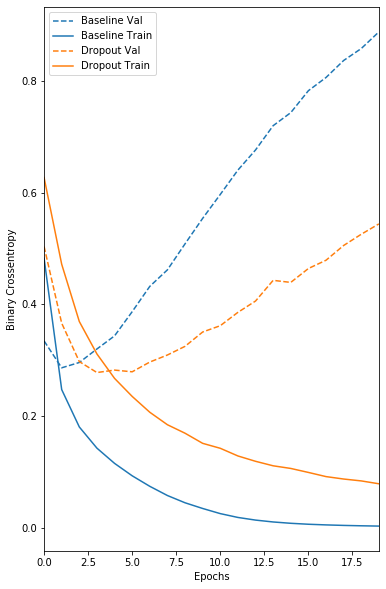

In [33]:
plot_history([
    ('baseline', baseline_history),
    ('dropout', dpt_model_history)
])